# Final Project Submission

Please fill out:
* Student name: 
* Student pace: self paced / part time / full time
* Scheduled project review date/time: 
* Instructor name: 
* Blog post URL:


# STUDENT NAME :MERCY MORAA ONDUSO
#STUDENT PACE: PART TIME
#SCHEDULED PROJECT REVIEW DATE: 09/11/2022

expected-to-do:
1. Load and read the data,
2. Check for films that are doing well at the box office,
3. Translate the findings into actionable insights
have a pdf presentation for the heads of dept in Microsoft

# 1.0 Importing libraries

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

# 1.1 Loading and reading datasets

In [3]:
movie_titlebasic = pd.read_csv("E:/Data Science/EDA files/title.basics.csv")
movie_titlebasic

,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"
...,...,...,...,...,...,...
146139,tt9916538,Kuambil Lagi Hatiku,Kuambil Lagi Hatiku,2019,123.0,Drama
146140,tt9916622,Rodolpho Teóphilo - O Legado de um Pioneiro,Rodolpho Teóphilo - O Legado de um Pioneiro,2015,NaN,Documentary
146141,tt9916706,Dankyavar Danka,Dankyavar Danka,2013,NaN,Comedy
146142,tt9916730,6 Gunn,6 Gunn,2017,116.0,NaN


In [4]:
movie_gross = pd.read_csv("E:/Data Science/EDA files/bom.movie_gross.csv")
movie_gross

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010
...,...,...,...,...,...
3382,The Quake,Magn.,6200.0,NaN,2018
3383,Edward II (2018 re-release),FM,4800.0,NaN,2018
3384,El Pacto,Sony,2500.0,NaN,2018
3385,The Swan,Synergetic,2400.0,NaN,2018


In [5]:
movie_titleratings = pd.read_csv("E:/Data Science/EDA files/title.ratings.csv")
movie_titleratings

,tconst,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21
...,...,...,...
73851,tt9805820,8.1,25
73852,tt9844256,7.5,24
73853,tt9851050,4.7,14
73854,tt9886934,7.0,5


# 2.0 Data Understanding

# 2.1 Dataframe Merging

The two files: title.ratings.csv and title.basics.csv have a common column. The column is tconst. This column can help us narrow down our analysis to one dataframe instead of counterchecking from both datasets.
I will use the pd.merge method

In [6]:
#merge titleratings and titlebasic using tconst
movie_ratings = pd.merge(movie_titleratings, movie_titlebasic)
movie_ratings.head()

,tconst,averagerating,numvotes,primary_title,original_title,start_year,runtime_minutes,genres
0,tt10356526,8.3,31,Laiye Je Yaarian,Laiye Je Yaarian,2019,117.0,Romance
1,tt10384606,8.9,559,Borderless,Borderless,2019,87.0,Documentary
2,tt1042974,6.4,20,Just Inès,Just Inès,2010,90.0,Drama
3,tt1043726,4.2,50352,The Legend of Hercules,The Legend of Hercules,2014,99.0,"Action,Adventure,Fantasy"
4,tt1060240,6.5,21,Até Onde?,Até Onde?,2011,73.0,"Mystery,Thriller"


In the next step, I am merging the 3 datasets as one dataframe to have an easy time analysing the datasets. 
In this case, the 'primary_title' column, in our already merged file, is the same as the 'title' column in the movie_gross dataset.



In [7]:
movie_ratings_gross = movie_ratings.merge(movie_gross, left_on = 'primary_title', right_on = 'title')
movie_ratings_gross.head()

,tconst,averagerating,numvotes,primary_title,original_title,start_year,runtime_minutes,genres,title,studio,domestic_gross,foreign_gross,year
0,tt1043726,4.2,50352,The Legend of Hercules,The Legend of Hercules,2014,99.0,"Action,Adventure,Fantasy",The Legend of Hercules,LG/S,18800000.0,42400000,2014
1,tt1171222,5.1,8296,Baggage Claim,Baggage Claim,2013,96.0,Comedy,Baggage Claim,FoxS,21600000.0,887000,2013
2,tt1181840,7.0,5494,Jack and the Cuckoo-Clock Heart,Jack et la mécanique du coeur,2013,94.0,"Adventure,Animation,Drama",Jack and the Cuckoo-Clock Heart,Shout!,NaN,3400000,2014
3,tt1210166,7.6,326657,Moneyball,Moneyball,2011,133.0,"Biography,Drama,Sport",Moneyball,Sony,75600000.0,34600000,2011
4,tt1212419,6.5,87288,Hereafter,Hereafter,2010,129.0,"Drama,Fantasy,Romance",Hereafter,WB,32700000.0,72500000,2010


In [8]:
movie_ratings_gross.tail()

,tconst,averagerating,numvotes,primary_title,original_title,start_year,runtime_minutes,genres,title,studio,domestic_gross,foreign_gross,year
3022,tt3399916,6.3,4185,The Dead Lands,The Dead Lands,2014,107.0,"Action,Adventure",The Dead Lands,Magn.,5200.0,NaN,2015
3023,tt3616916,6.7,28167,The Wave,Bølgen,2015,105.0,"Action,Drama,Thriller",The Wave,Magn.,177000.0,NaN,2016
3024,tt3748512,7.4,4977,Hitchcock/Truffaut,Hitchcock/Truffaut,2015,79.0,Documentary,Hitchcock/Truffaut,Cohen,260000.0,NaN,2015
3025,tt7008872,7.0,18768,Boy Erased,Boy Erased,2018,115.0,"Biography,Drama",Boy Erased,Focus,6800000.0,5000000,2018
3026,tt7048622,7.7,11168,The Insult,L'insulte,2017,113.0,"Crime,Drama,Thriller",The Insult,Cohen,1000000.0,NaN,2018


From the analysis above: using the head() and the tail() method, there is no criteria in which these datasets were arranged in.

In [9]:
movie_ratings_gross.columns

Index(['tconst', 'averagerating', 'numvotes', 'primary_title',
       'original_title', 'start_year', 'runtime_minutes', 'genres', 'title',
       'studio', 'domestic_gross', 'foreign_gross', 'year'],
      dtype='object')

# 2.2 Dataframe Inspection

Checking the number of columns and rows in the dataset

In [10]:
movie_ratings_gross.shape

(3027, 13)

Next is checking the data types of the dataframes. As well as checking for missing values

In [11]:
movie_ratings_gross.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3027 entries, 0 to 3026
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   tconst           3027 non-null   object 
 1   averagerating    3027 non-null   float64
 2   numvotes         3027 non-null   int64  
 3   primary_title    3027 non-null   object 
 4   original_title   3027 non-null   object 
 5   start_year       3027 non-null   int64  
 6   runtime_minutes  2980 non-null   float64
 7   genres           3020 non-null   object 
 8   title            3027 non-null   object 
 9   studio           3024 non-null   object 
 10  domestic_gross   3005 non-null   float64
 11  foreign_gross    1832 non-null   object 
 12  year             3027 non-null   int64  
dtypes: float64(3), int64(3), object(7)
memory usage: 331.1+ KB


In [12]:
movie_ratings_gross['foreign_gross'] = pd.to_numeric(movie_ratings_gross['foreign_gross'], errors = 'ignore')

From the above information, the columns with missing values are: 'runtime_minutes','genres', 'studio', 'domestic_gross' and 'foreign_gross'.


The 'genres' column is very sensitive since it will help in the final decision as to which type of movies Microsoft should start investing in. We cannot guess which genre a particular movie is in and so, dropping the null values in this column will help narrow down our analysis.

The 'studio' column as well wil have minimal impact to our final analysis.


# 3.0 Data Cleaning and Scrubbing

In [13]:
movie_ratings_gross1 = movie_ratings_gross.drop(['runtime_minutes', 'studio'], axis = 1)
movie_ratings_gross1.head()

,tconst,averagerating,numvotes,primary_title,original_title,start_year,genres,title,domestic_gross,foreign_gross,year
0,tt1043726,4.2,50352,The Legend of Hercules,The Legend of Hercules,2014,"Action,Adventure,Fantasy",The Legend of Hercules,18800000.0,42400000,2014
1,tt1171222,5.1,8296,Baggage Claim,Baggage Claim,2013,Comedy,Baggage Claim,21600000.0,887000,2013
2,tt1181840,7.0,5494,Jack and the Cuckoo-Clock Heart,Jack et la mécanique du coeur,2013,"Adventure,Animation,Drama",Jack and the Cuckoo-Clock Heart,NaN,3400000,2014
3,tt1210166,7.6,326657,Moneyball,Moneyball,2011,"Biography,Drama,Sport",Moneyball,75600000.0,34600000,2011
4,tt1212419,6.5,87288,Hereafter,Hereafter,2010,"Drama,Fantasy,Romance",Hereafter,32700000.0,72500000,2010


The 'original_title' , 'title' and the 'primary_title' column are the same. Only difference being that, in some instances the 'original_title' is written in the movies' original language and not English. 
In conclusion of the columns overall analysis, there are columns that are better off dropped than maintained from this point onwards.

In [14]:
movie_ratings_gross2 = movie_ratings_gross1.drop(['original_title','year', 'primary_title', 'title'], axis =1)
movie_ratings_gross2.head()

,tconst,averagerating,numvotes,start_year,genres,domestic_gross,foreign_gross
0,tt1043726,4.2,50352,2014,"Action,Adventure,Fantasy",18800000.0,42400000
1,tt1171222,5.1,8296,2013,Comedy,21600000.0,887000
2,tt1181840,7.0,5494,2013,"Adventure,Animation,Drama",NaN,3400000
3,tt1210166,7.6,326657,2011,"Biography,Drama,Sport",75600000.0,34600000
4,tt1212419,6.5,87288,2010,"Drama,Fantasy,Romance",32700000.0,72500000


# 3.1 Checking for missing values in columns

In [15]:
movie_ratings_gross2['foreign_gross'].isnull().sum()

1195

In [16]:
movie_ratings_gross2['foreign_gross'].nunique()

1006

There are 1195 null values in the column 'foreign_gross'. So it will be difficult to replace the null values with median, mean and mode.

In [17]:
movie_ratings_gross2.describe()

,averagerating,numvotes,start_year,domestic_gross
count,3027.000000,3.027000e+03,3027.000000,3.005000e+03
mean,6.457582,6.170030e+04,2013.783284,3.064033e+07
std,1.012277,1.255132e+05,2.466955,6.671629e+07
min,1.600000,5.000000e+00,2010.000000,1.000000e+02
25%,5.900000,2.117000e+03,2012.000000,1.390000e+05
50%,6.600000,1.310900e+04,2014.000000,2.000000e+06
75%,7.100000,6.276550e+04,2016.000000,3.250000e+07
max,9.200000,1.841066e+06,2019.000000,7.001000e+08


# 3.2 Checking for duplicates

In [18]:
movie_ratings_gross2.duplicated().sum()

0

From the analysis above, there are no duplicates in our dataset. So, we proceed to the analytical part of it where the missing values for domestic_gross can be replaced by either the mean and median. 

# 3.3 Statistical aggregation

In [20]:
movie_ratings_gross2['domestic_gross'].mean()

30640331.54076539

The mean of the domestic_gross is high due to the number of movies that generate exceedingly more revenues as compared to other movies. So we cannot use the mean to replace the null values in the column

In [21]:
movie_ratings_gross2['domestic_gross'].mode()

0    1300000.0
dtype: float64

The mode of the domestic_gross can be an option, if there is need to replace the null values with the necessary aggregate.

In [22]:
movie_ratings_gross2['domestic_gross'].median()

2000000.0

In [23]:
movie_ratings_gross2.isnull().sum()

tconst               0
averagerating        0
numvotes             0
start_year           0
genres               7
domestic_gross      22
foreign_gross     1195
dtype: int64

In [24]:
movie_ratings_gross2['domestic_gross'] = movie_ratings_gross['domestic_gross'].fillna(13000).astype(float)

The number of missing values is less and we can afford to either replace it using mode or median. The other option is 
dropping the missing values and using the remaining dataset in data analysis.

In [25]:
movie_ratings_gross2.shape

(3027, 7)

In [26]:
movie_ratings_gross2.isna().sum()

tconst               0
averagerating        0
numvotes             0
start_year           0
genres               7
domestic_gross       0
foreign_gross     1195
dtype: int64

Next, checking for outliers in our dataset. Let us sort our domestic_gross col in descending order first
First, Lets fill the missing values in the domestic_gross column using the m

# 3.4 Sorting data columns

In [27]:
rating_genres = movie_ratings_gross2.sort_values('domestic_gross' , ascending = False)
rating_genres

,tconst,averagerating,numvotes,start_year,genres,domestic_gross,foreign_gross
581,tt1825683,7.3,516148,2018,"Action,Adventure,Sci-Fi",700100000.0,646900000
2984,tt4154756,8.5,670926,2018,"Action,Adventure,Sci-Fi",678800000.0,"1,369.5"
475,tt0369610,7.0,539338,2015,"Action,Adventure,Sci-Fi",652300000.0,"1,019.4"
400,tt2527336,7.1,462903,2017,"Action,Adventure,Fantasy",620200000.0,712400000
2171,tt3606756,7.7,203510,2018,"Action,Adventure,Animation",608600000.0,634200000
...,...,...,...,...,...,...,...
889,tt1131724,5.8,16318,2017,Thriller,400.0,NaN
2896,tt1757742,5.1,10575,2011,"Horror,Thriller",400.0,426000
1776,tt8331988,7.1,147,2018,Drama,300.0,NaN
1448,tt4796122,3.7,5381,2016,Horror,300.0,NaN


# 3.5 Use IQR to check for the outliers

In [28]:
Q1 = np.percentile(rating_genres['domestic_gross'], 25,
                   interpolation = 'midpoint')
 
Q3 = np.percentile(rating_genres['domestic_gross'], 75,
                   interpolation = 'midpoint')
IQR = Q3 - Q1
lower = (Q1 - 1.5*IQR)
lower

-47830000.0

The outliers are extreme. Hence will be ignored

In [29]:
rating_genres1 = rating_genres[rating_genres['averagerating']> 5 ]
rating_genres1.head()

,tconst,averagerating,numvotes,start_year,genres,domestic_gross,foreign_gross
581,tt1825683,7.3,516148,2018,"Action,Adventure,Sci-Fi",700100000.0,646900000
2984,tt4154756,8.5,670926,2018,"Action,Adventure,Sci-Fi",678800000.0,"1,369.5"
475,tt0369610,7.0,539338,2015,"Action,Adventure,Sci-Fi",652300000.0,"1,019.4"
400,tt2527336,7.1,462903,2017,"Action,Adventure,Fantasy",620200000.0,712400000
2171,tt3606756,7.7,203510,2018,"Action,Adventure,Animation",608600000.0,634200000


In [30]:
rating_genres1.tail()

,tconst,averagerating,numvotes,start_year,genres,domestic_gross,foreign_gross
1662,tt1876277,7.2,18040,2012,"Action,Biography,Drama",700.0,NaN
114,tt1384927,7.1,3234,2011,"Animation,Drama",600.0,NaN
889,tt1131724,5.8,16318,2017,Thriller,400.0,NaN
2896,tt1757742,5.1,10575,2011,"Horror,Thriller",400.0,426000
1776,tt8331988,7.1,147,2018,Drama,300.0,NaN


In [31]:
rating_genres2 = rating_genres1[rating_genres1['domestic_gross'] >= 200000]
rating_genres2.head()

,tconst,averagerating,numvotes,start_year,genres,domestic_gross,foreign_gross
581,tt1825683,7.3,516148,2018,"Action,Adventure,Sci-Fi",700100000.0,646900000
2984,tt4154756,8.5,670926,2018,"Action,Adventure,Sci-Fi",678800000.0,"1,369.5"
475,tt0369610,7.0,539338,2015,"Action,Adventure,Sci-Fi",652300000.0,"1,019.4"
400,tt2527336,7.1,462903,2017,"Action,Adventure,Fantasy",620200000.0,712400000
2171,tt3606756,7.7,203510,2018,"Action,Adventure,Animation",608600000.0,634200000


In [32]:
rating_genres2.tail()

,tconst,averagerating,numvotes,start_year,genres,domestic_gross,foreign_gross
1875,tt2066176,7.5,5464,2012,Drama,201000.0,NaN
1814,tt1629705,6.6,8553,2011,"Action,Adventure,Western",201000.0,423000
2146,tt6330052,5.9,1182,2017,"Biography,Drama,Romance",200000.0,3100000
2583,tt1231586,6.2,19805,2011,"Comedy,Romance",200000.0,NaN
1103,tt3093546,6.3,5740,2014,"Comedy,Drama",200000.0,NaN


In [33]:
rating_genres2.shape

(1965, 7)

From the above analysis, looking at the averagerating and the domestic_gross, we can conclude that the most watched and liked genres fall in either categories: action, adventure, Sci-Fi, animation, comedy, drama , documentary or fantasy.Splitting the genres into categories

In [34]:
rating_genres2 = rating_genres.copy()
rating_genres2['genres'] = rating_genres2['genres'].str.split(',').copy()
rating_genres2 = rating_genres2.explode('genres')
rating_genres2['genres'].unique()

array(['Action', 'Adventure', 'Sci-Fi', 'Fantasy', 'Animation', 'Comedy',
       'Thriller', 'Documentary', 'Drama', 'Sport', 'Romance', 'Family',
       'Biography', 'History', 'Crime', 'Horror', 'Mystery', 'Music',
       'Musical', 'Western', nan, 'War', 'News'], dtype=object)

# 4.0 Data Visualization

# 4.1 Plotting the categories of genres

<AxesSubplot:xlabel='genres'>

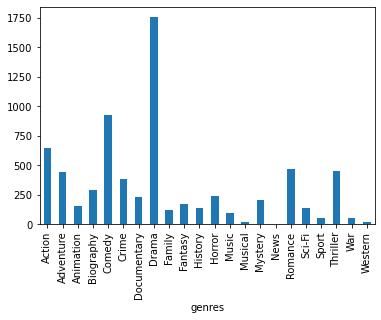

In [35]:
rating_genres2.groupby('genres').size().plot(kind='bar')

# 4.2 Comparing the domestic gross and the genres using a barplot

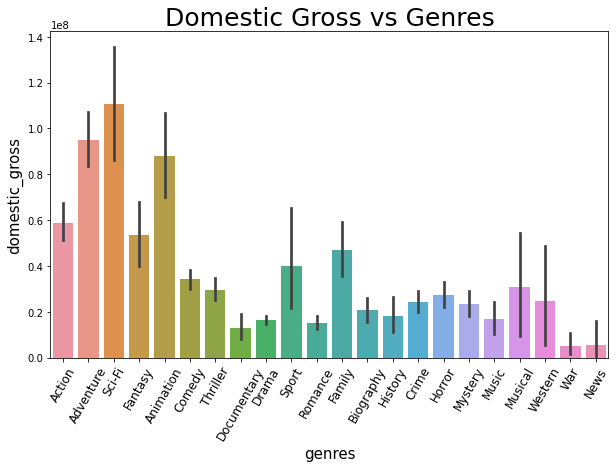

In [36]:
fig, ax = plt.subplots(figsize = (10,6))
ax = sns.barplot(x = 'genres', y = 'domestic_gross', data = rating_genres2)
plt.xticks(rotation = 60, fontsize = 12)
ax.set_xlabel('genres', fontsize = 15)
ax.set_ylabel('domestic_gross', fontsize = 15)
ax.set_title('Domestic Gross vs Genres', fontsize = 25);

From the bar graph above, the leading 5 genres in terms of domestic gross are: Sci-fi, Adventure, Animation, Action and Fantasy

# 4.3 Comparing Average Rating and Domestic Gross using a barplot

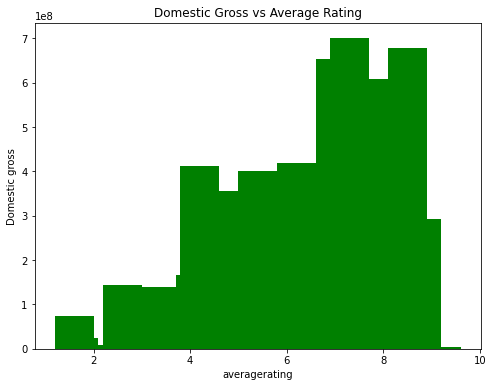

In [37]:
plt.figure(figsize = (8, 6))
x = rating_genres2.averagerating
y = rating_genres2.domestic_gross
plt.bar(x,y, color = 'green')
plt.xlabel('averagerating')
plt.ylabel('Domestic gross')
plt.title('Domestic Gross vs Average Rating')
plt.show();

From the bar graph above, the higher the Average rating, the more the domestic gross and the lower the Average rating the lesser the domestic gross

# 4.4  Comparing the genres and domestic gross using a scatterplot

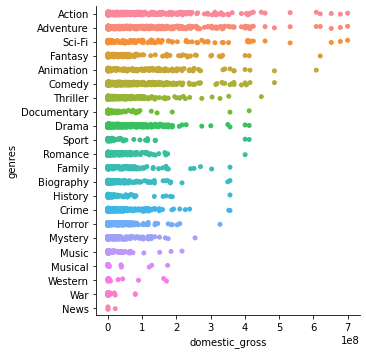

In [38]:
sns.catplot(data=rating_genres2, x=rating_genres2['domestic_gross'], y= rating_genres2['genres']);

From the above scatter plot, the leading 5 genres in the box office are: Action, Adventure, Sci-Fi, Fantasy and Animation 

# 5. Recommendation

From the above analysis, I would advise the new head of Microsoft's studio to invest in producing movies that are expected to have good returns to the company. The genres doing well are : Action, Adventure, Sci-Fi, Animation, Fantasy, Comedy, Thriller and Comedy.
A combination of either of the top genres is also recommended as is seen in the datasets provided. 
The genres to extremely avoid are those with the least returns in terms of domestic gross. The least in returns are: News, War, Western, Musical and Music